# Polynomial Linear Regression
**Polynomial Linear Regression Genel Formülü:**


y = a + b1x + b2x^2 + b3x^3 + ... + bNx^N

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [36]:
# Veri setimizi pandas yardımıyla alıp dataframe nesnemiz olan df'in içine atıyoruz.

df = pd.read_csv("polynomial.csv", sep = ";")

# bir adet polynomial regression nesnesi oluşturması için PolynomialFeatures fonksiyonunu çağırıyoruz.
# bu fonksiyonu çalıştırırken polinom derecesini (N) belirtiyoruz.

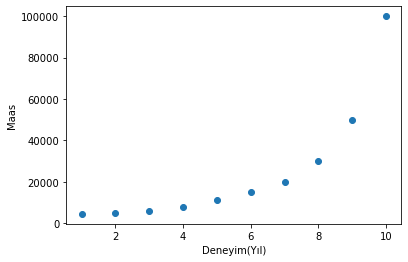

In [13]:
# Veri setimize bir bakalım.

plt.scatter(df["deneyim"],df["maas"])
plt.xlabel("Deneyim(Yıl)")
plt.ylabel("Maas")
plt.savefig("1.png", dpi = 300);

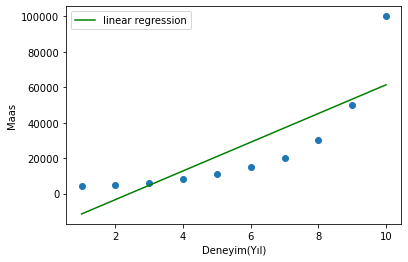

In [23]:
# Görüldüğü gibi veriler hiç doğrusal bir şekilde dağılmıyor. 
# Eğer biz bu veri setine Linear Regression uygularsak hiç uygun olmayan bir tahmin çizgisi görürüz.

reg = LinearRegression()
reg.fit(df[["deneyim"]],df["maas"])

plt.xlabel("Deneyim(Yıl)")
plt.ylabel("Maas")

plt.scatter(df["deneyim"],df["maas"])

xekseni = df["deneyim"]
yekseni = reg.predict(df[["deneyim"]])
plt.plot(xekseni, yekseni, color = "green", label = "linear regression")
plt.legend();


**Görüldüğü gibi tahmin için çok kötü bir doğru. Veri setine göre model seçmeliyiz. 
Bu veri seti için Linear Regression modeli kesinlikle hatalı sonuçlar doğuracaktır.**

x değerimizi yukarıdaki fonksiyona uyacak şekilde uyarlanmasını sağlıyoruz.
Örneğin 1,x,x^2 (n=2) şeklinde.

In [37]:
polynomial_regression = PolynomialFeatures(degree = 4) #degree = N (Yukarıdaki polinom fonksiyonu.)

x_polynomial = polynomial_regression.fit_transform(df[["deneyim"]])

In [38]:
# regression model nesnemiz olan reg nesnemizi oluşturup bunun fit methodunu çağırarak x_polynomial ve y eksenlerini fit ediyor.
# yani regression modelimizi mevcut gerçek verilerle eğitiyoruz.

reg = LinearRegression()
reg.fit(x_polynomial,df["maas"])

LinearRegression()

#### Modelimiz hazır ve eğitilmiş. Şimdi eldeki verilere göre modelimiz nasıl bir sonuç grafiği oluşturuyor, görelim!

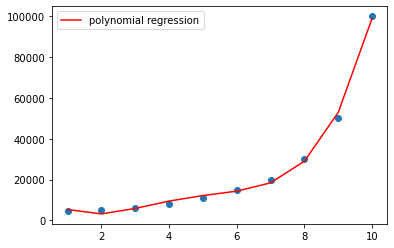

In [39]:
y_head = reg.predict(x_polynomial)
plt.plot(df["deneyim"], y_head, color = "red", label = "polynomial regression")
# plt.plot(xekseni, yekseni, color = "green", label = "linear regression")

# veri setimizi de noktalı bir şekilde scatter edelim ve polynomial regression'ın uyup uymadığını görelim.
plt.scatter(df["deneyim"],df["maas"])
plt.legend();

# Amaç

#### Ara yönetici tanımlayalım ve seviyesi 4-5 arasında olsun. Yani 4.5

In [43]:
x_polynomial1 = polynomial_regression.fit_transform([[4.5]])
reg.predict(x_polynomial1)

array([10958.21496212])

#### Alacağı maaş doğru bir şekilde şirket politikasına fit etmiş oluyor.